In [3]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from layers import *
from activations import *
from metrics import *
from optimizers import *
from model import Model

In [4]:
URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
FILE = "fashion_mnist_images.zip"
FOLDER = "fashion_mnist_images"

In [3]:
if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

In [6]:
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

Unzipping images...


In [4]:
def load_mnist_dataset(dataset, path):
    labels = os.listdir(os.path.join(path, dataset))
    X = []
    y = []
    
    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)            
            X.append(image)
            y.append(label)
    
    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    return X, y, X_test, y_test

In [5]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

In [6]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [7]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


In [8]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Class: 7


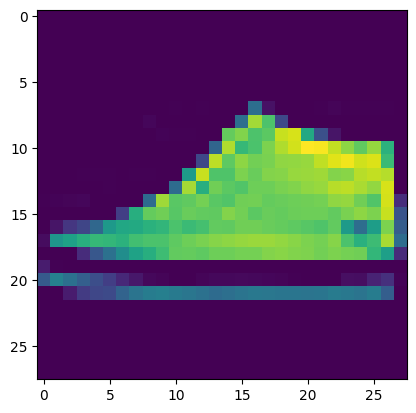

In [9]:
c = 7

print("Class:", y[c])
plt.imshow((X[c].reshape(28, 28)))
plt.show()

In [12]:
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.062, loss: 3.110 (data_loss: 3.110,reg_loss: 0.000), lr: 0.001
    step: 100, acc: 0.828, loss: 0.576 (data_loss: 0.576,reg_loss: 0.000), lr: 0.0009090909090909091
    step: 200, acc: 0.836, loss: 0.445 (data_loss: 0.445,reg_loss: 0.000), lr: 0.0008333333333333334
    step: 300, acc: 0.852, loss: 0.395 (data_loss: 0.395,reg_loss: 0.000), lr: 0.0007692307692307692
    step: 400, acc: 0.859, loss: 0.487 (data_loss: 0.487,reg_loss: 0.000), lr: 0.0007142857142857143
    step: 468, acc: 0.844, loss: 0.456 (data_loss: 0.456,reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.794, loss: 0.572 (data_loss: 0.572, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.840,loss: 0.440

epoch: 2
    step: 0, acc: 0.844, loss: 0.511 (data_loss: 0.511,reg_loss: 0.000), lr: 0.0006807351940095304
    step: 100, acc: 0.820, loss: 0.488 (data_loss: 0.488,reg_loss: 0.000), lr: 0.0006373486297004461
    step: 200, acc: 0.844, loss: 0.388 (data_loss: 0.388,reg_lo